# **Hugging DataSet**

In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset


# Loading the dataset from Hugging Face
dataset = load_dataset("tanzuhuggingface/creditcardfraudtraining")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/182 [00:00<?, ?B/s]

credit_card_resampled.csv:   0%|          | 0.00/163M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2085138 [00:00<?, ? examples/s]

In [3]:
Credit_df  = pd.DataFrame(dataset['train'])

In [4]:

Credit_df


,id,index,time_elapsed,cc_num,amt,lat,long,is_fraud
0,0,347210,1,4.158950e+15,3.340000,40.430800,-79.920500,0
1,1,347244,1,4.797300e+18,16.540000,38.893800,-86.524600,0
2,2,347249,1,4.586810e+15,29.840000,32.548600,-80.307000,0
3,3,347278,1,4.956830e+18,101.560000,40.674700,-74.223900,0
4,4,347293,2,4.561550e+12,3.590000,34.988900,-106.061000,0
...,...,...,...,...,...,...,...,...
2085133,2085133,621655,4,-2.124232e+18,153.984941,38.734121,-105.612185,1
2085134,2085134,198665,13,1.623557e+18,897.472037,31.135096,-76.789361,1
2085135,2085135,-115788,11,-8.426380e+17,1301.453019,47.524165,-31.288224,1
2085136,2085136,1191690,9,2.692801e+18,311.180351,47.411219,-50.518979,1


In [5]:
Credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085138 entries, 0 to 2085137
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   index         int64  
 2   time_elapsed  int64  
 3   cc_num        float64
 4   amt           float64
 5   lat           float64
 6   long          float64
 7   is_fraud      int64  
dtypes: float64(4), int64(4)
memory usage: 127.3 MB


In [20]:
Credit_df['is_fraud'].value_counts()

,count
is_fraud,
0,1042569
1,1042569


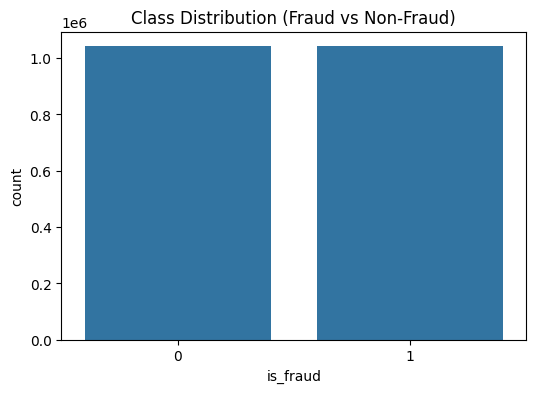

In [6]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=Credit_df )
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


In [7]:
# Check for missing values
print("Missing values per column:")
print(Credit_df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(Credit_df.dtypes)


Missing values per column:
id              0
index           0
time_elapsed    0
cc_num          0
amt             0
lat             0
long            0
is_fraud        0
dtype: int64

Data types of each column:
id                int64
index             int64
time_elapsed      int64
cc_num          float64
amt             float64
lat             float64
long            float64
is_fraud          int64
dtype: object


In [9]:
# Summary statistics
Credit_df.describe()

,id,index,time_elapsed,cc_num,amt,lat,long,is_fraud
count,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2085138.0
mean,1.042568e+06,5.049692e+05,1.169697e+00,3.965088e+17,2.992306e+02,3.858014e+01,-9.004107e+01,0.5
std,6.019276e+05,4.089742e+05,7.291183e+00,1.637756e+18,4.955343e+02,6.704931e+00,1.827680e+01,0.5
min,0.000000e+00,-1.612912e+06,-3.000000e+01,-6.986079e+18,-2.159578e+03,1.511058e+00,-2.269371e+02,0.0
25%,5.212842e+05,2.117852e+05,0.000000e+00,6.304420e+11,1.501000e+01,3.408775e+01,-9.925484e+01,0.0
50%,1.042568e+06,5.054810e+05,0.000000e+00,3.543300e+15,8.474000e+01,3.911268e+01,-8.799734e+01,0.5
75%,1.563853e+06,8.031388e+05,2.000000e+00,5.330299e+17,5.406551e+02,4.272800e+01,-7.844002e+01,1.0
max,2.085137e+06,2.794497e+06,8.300000e+01,1.122925e+19,2.894890e+04,9.152811e+01,1.470988e-01,1.0


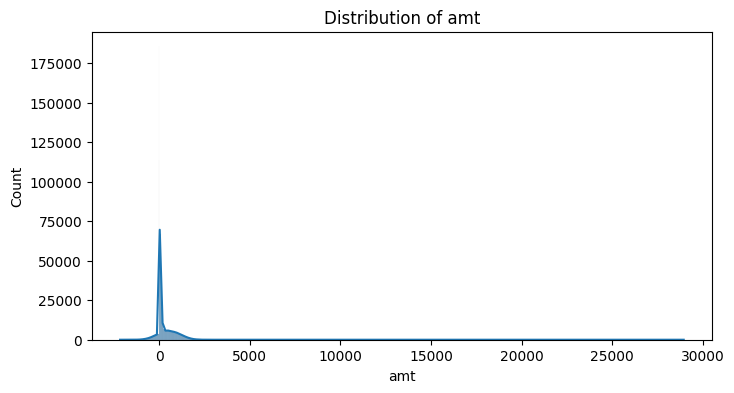

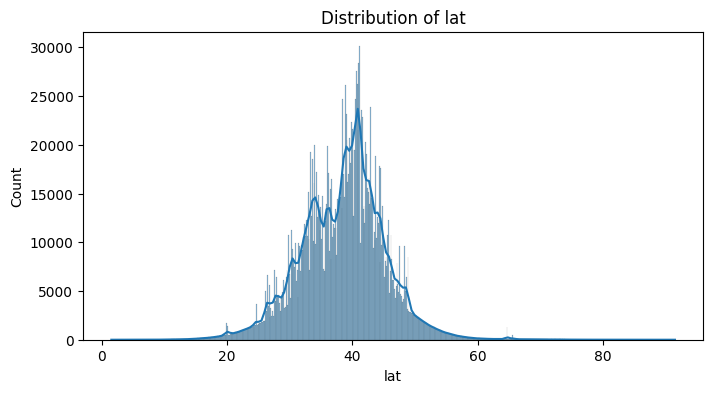

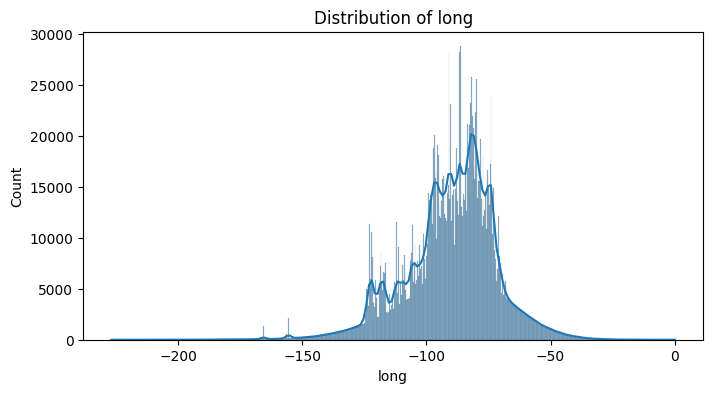

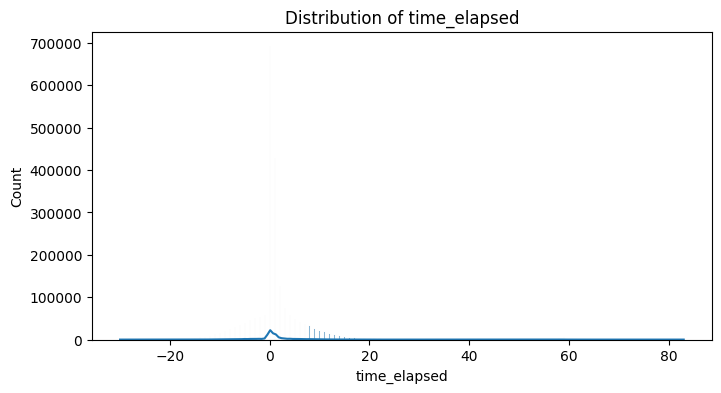

In [ ]:
# Distribution plots for numerical features
numerical_features = ['amt', 'lat', 'long', 'time_elapsed']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(Credit_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [10]:
Credit_df.drop(columns=['id', 'index','cc_num'], inplace=True)

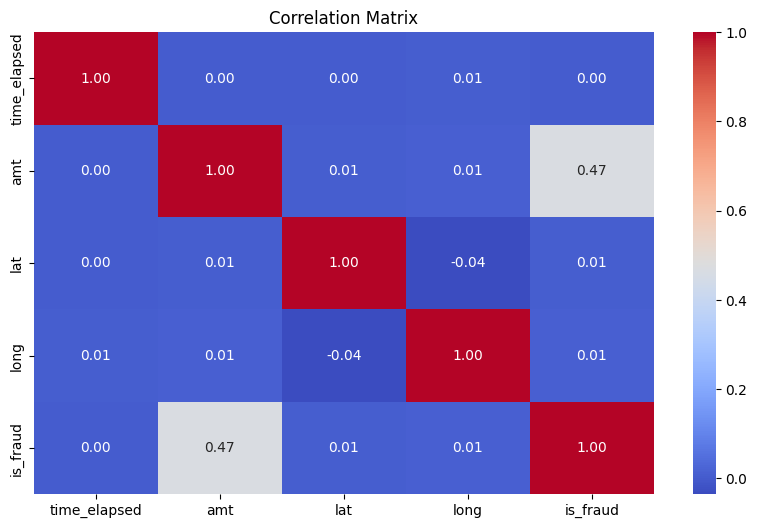

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = Credit_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [14]:

# Separate features and target variable
X = Credit_df.drop(columns=['is_fraud'])
y = Credit_df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




In [15]:
from sklearn.linear_model import LogisticRegression

# Train a model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance:
Accuracy: 0.8233
Precision: 0.9632
Recall: 0.6723
F1 Score: 0.7918


In [16]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Train a model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance:
Accuracy: 0.9843
Precision: 0.9889
Recall: 0.9795
F1 Score: 0.9842


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance:
Accuracy: 0.9826
Precision: 0.9863
Recall: 0.9789
F1 Score: 0.9825


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [18]:

# Initialize the RandomForest Tree model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance:
Accuracy: 0.9848
Precision: 0.9897
Recall: 0.9798
F1 Score: 0.9847


In [24]:

# Initialize the MLP Classifier (NN) Tree model
model = MLPClassifier(random_state=42, max_iter=10)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Performance:
Accuracy: 0.9678
Precision: 0.9757
Recall: 0.9595
F1 Score: 0.9675


In [25]:

# Initialize the MLP Classifier (NN) Tree model
model = MLPClassifier(random_state=42, max_iter=100)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance:
Accuracy: 0.9699
Precision: 0.9794
Recall: 0.9599
F1 Score: 0.9696
